In [1]:
# 0. Imports and load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv')   # adjust filename if different
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# 1. Basic shape and types
print("Shape:", df.shape)
df.info()

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 2. Summary stats numeric
df.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [4]:
# 3. Summary for categorical columns
df.describe(include=['object','category']).T

count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644

In [5]:
# 4. Missing value counts and percent
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['missing_count','missing_percent'])

missing_count  missing_percent
Cabin                  687        77.104377
Age                    177        19.865320
Embarked                 2         0.224467
PassengerId              0         0.000000
Survived                 0         0.000000
Pclass                   0         0.000000
Name                     0         0.000000
Sex                      0         0.000000
SibSp                    0         0.000000
Parch                    0         0.000000
Ticket                   0         0.000000
Fare                     0         0.000000

In [6]:
# Numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

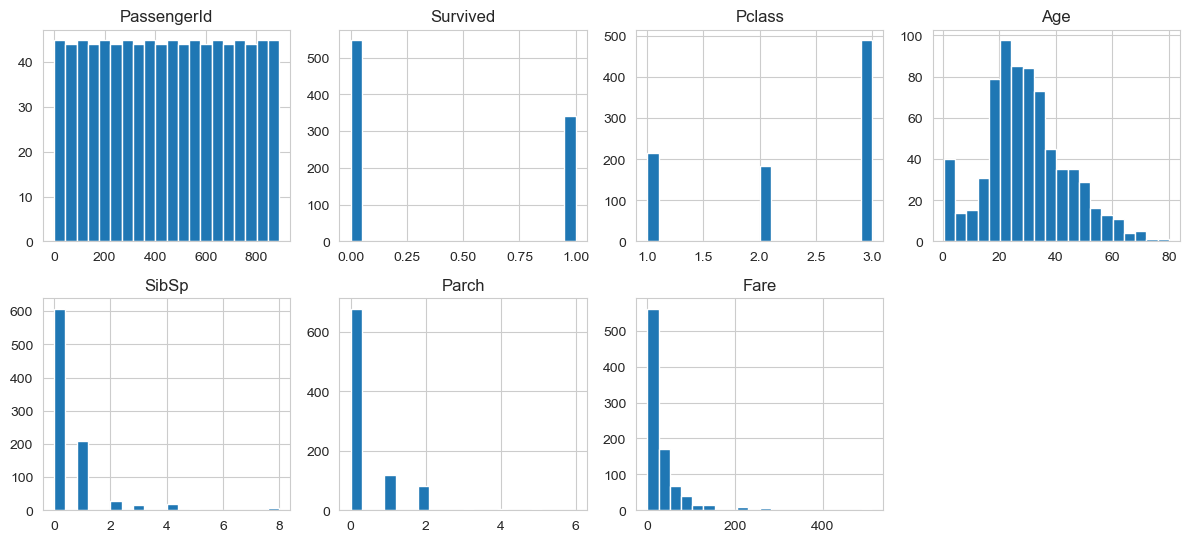

In [7]:
# 2. Histograms
df[num_cols].hist(bins=20, figsize=(12,8), layout=(3,4))
plt.tight_layout()
plt.show()

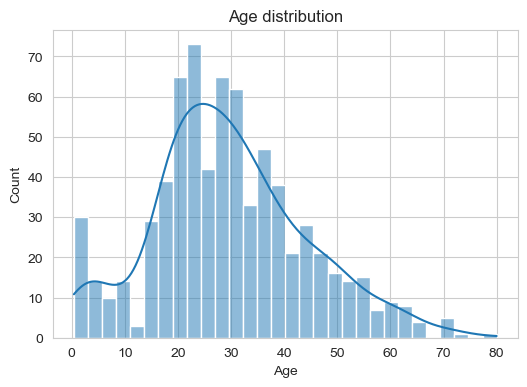

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

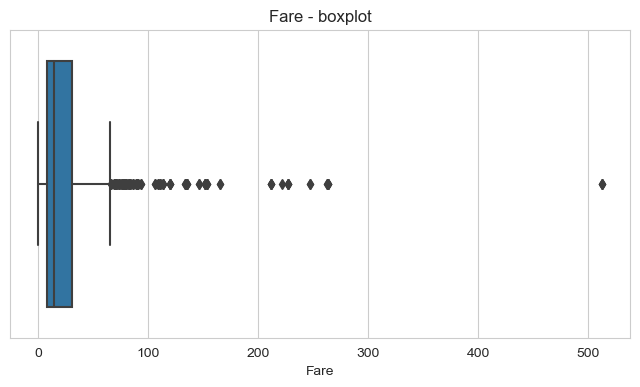

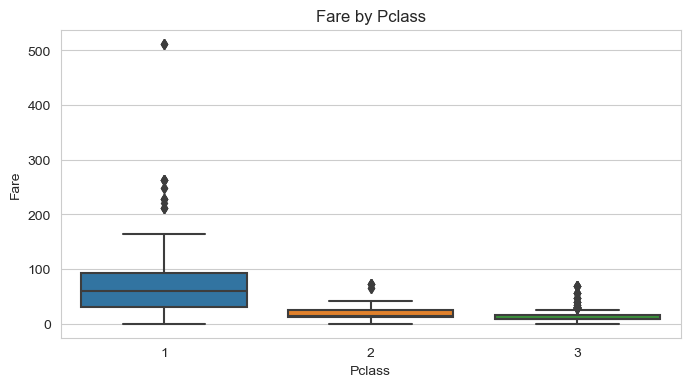

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Fare - boxplot')
plt.show()

# Boxplots per class (Pclass)
plt.figure(figsize=(8,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.show()

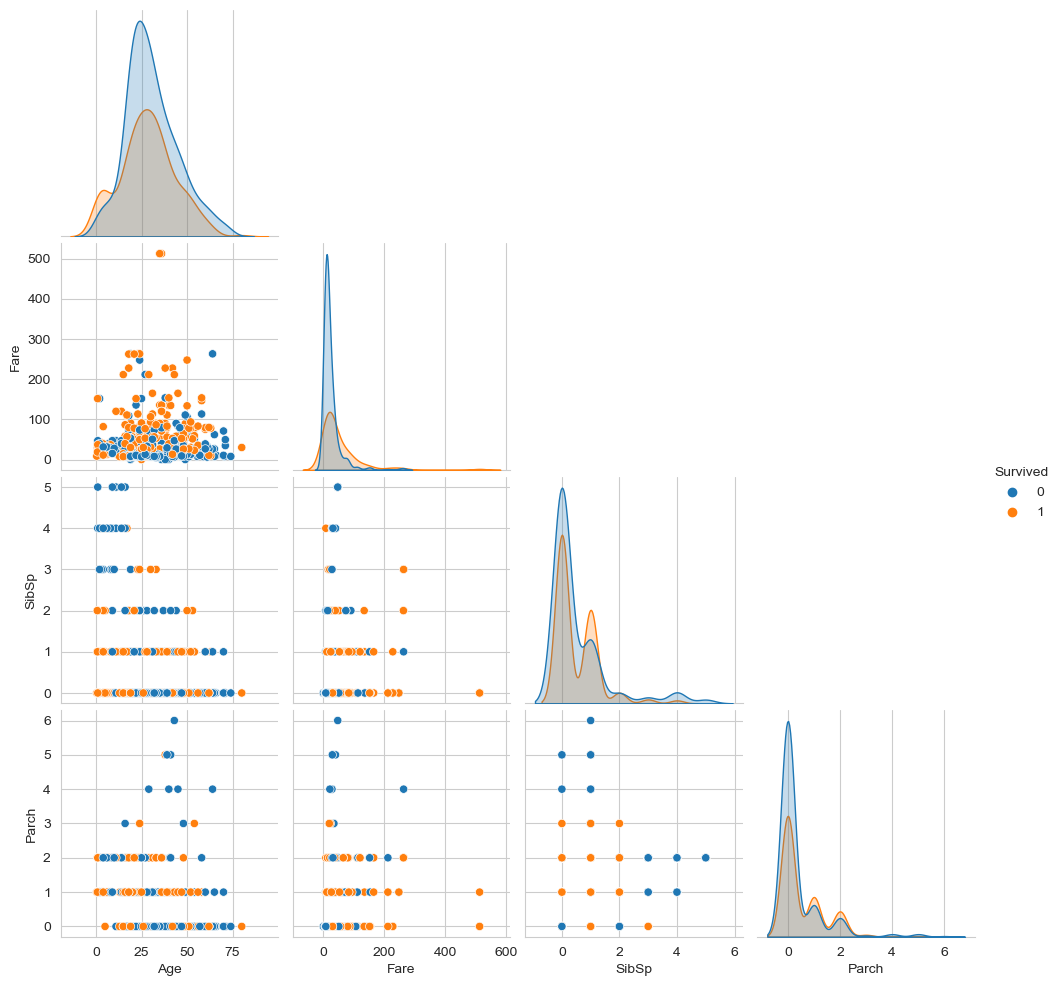

In [10]:
# Select a few numeric columns for pairplot
cols = ['Age','Fare','SibSp','Parch','Survived']
sns.pairplot(df[cols].dropna(), hue='Survived', diag_kind='kde', corner=True)
plt.show()

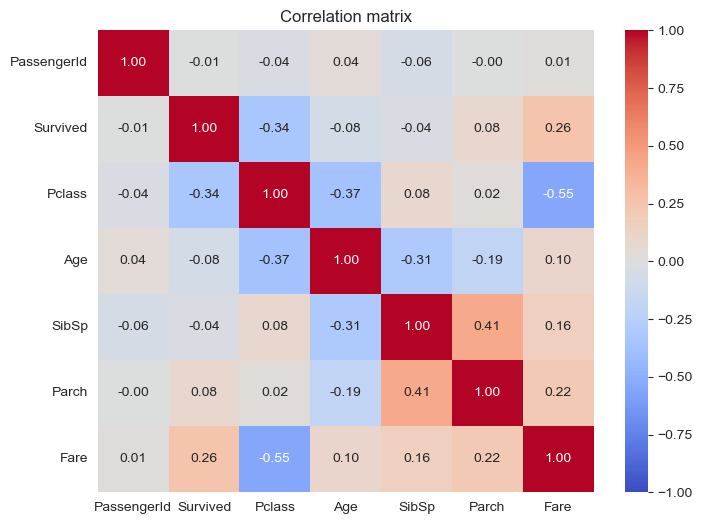

In [11]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

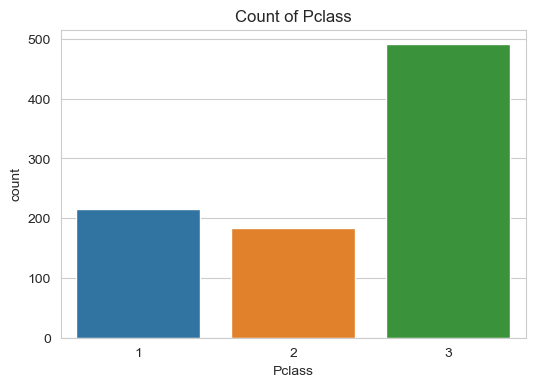

In [12]:
# Countplots
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Count of Pclass')
plt.show()

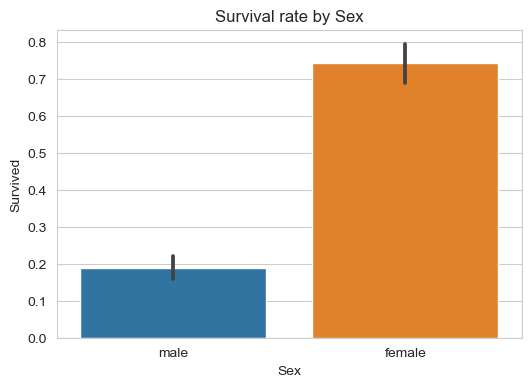

In [13]:
# Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by Sex')
plt.show()

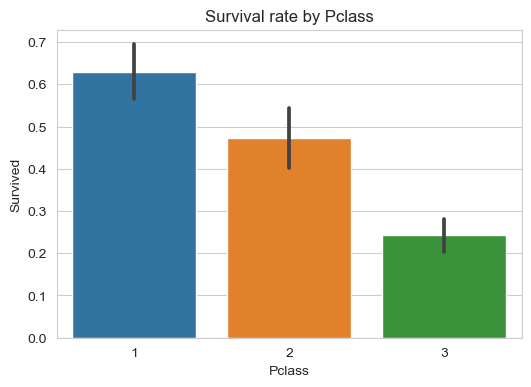

In [14]:
# Survival rate by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival rate by Pclass')
plt.show()

In [15]:
skew_vals = df[num_cols].skew().sort_values(ascending=False)
skew_vals

Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64

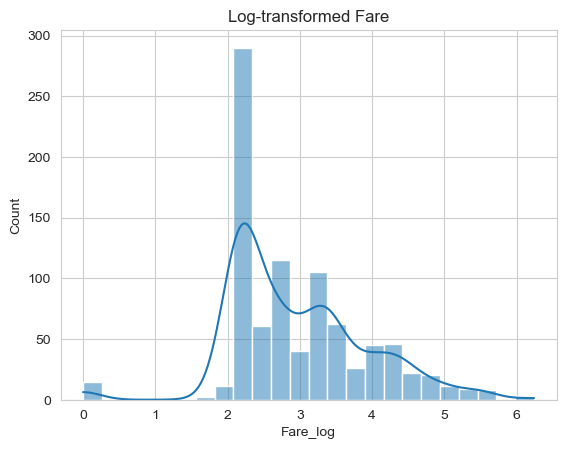

In [16]:
df['Fare_log'] = np.log1p(df['Fare'])
sns.histplot(df['Fare_log'], kde=True)
plt.title('Log-transformed Fare')
plt.show()

In [17]:
# Survival rate by Pclass and Sex
df.groupby(['Pclass','Sex'])['Survived'].mean().unstack()

# Mean age by Pclass
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

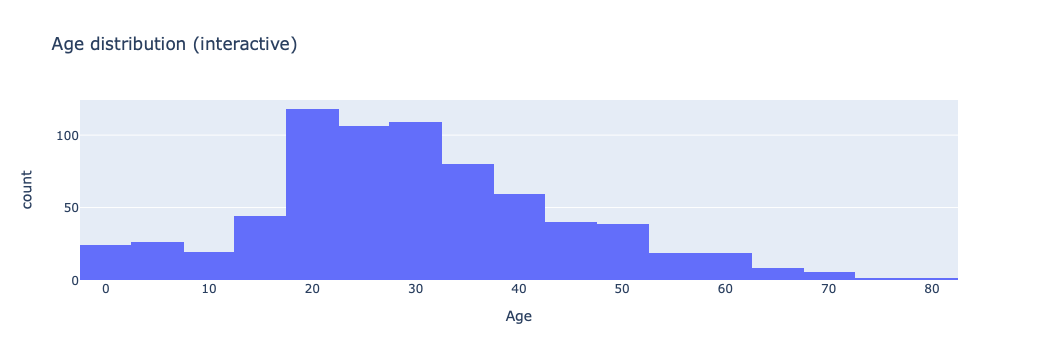

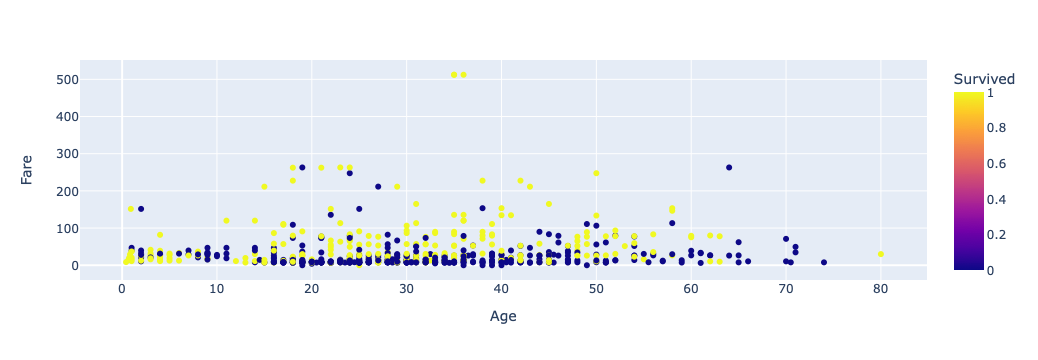

In [18]:
fig = px.histogram(df, x='Age', nbins=30, title='Age distribution (interactive)')
fig.show()

fig2 = px.scatter(df, x='Age', y='Fare', color='Survived', hover_data=['Name','Pclass'])
fig2.show()


In [19]:
summary = df.describe(include='all').T
summary.to_csv('eda_summary_stats.csv')


In [29]:
import os
os.makedirs("plots", exist_ok=True)



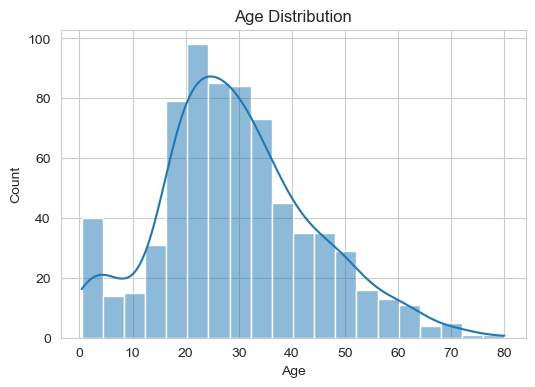

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))           # <-- IMPORTANT: no ellipsis here
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.savefig('plots/age_hist.png', dpi=150, bbox_inches='tight')
plt.show()

